In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
data = pd.read_csv('framingham.csv')

print(data.head())


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [26]:
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

In [27]:
print("Missing values per column:")
print(data.isnull().sum())

data = data.dropna()

print(f"Dataset shape after dropping missing values: {data.shape}")


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Dataset shape after dropping missing values: (3656, 16)


In [28]:
X = data.drop(columns=["TenYearCHD"]) 
y = data["TenYearCHD"]               

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (3656, 15)
Target vector shape: (3656,)


In [17]:
data = data.dropna()
X = data[['HoursStudied', 'PreviousScores']]  
y = data['PerformanceIndex']        

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (10000, 2)
Target shape: (10000,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (2559, 15), (2559,)
Testing set shape: (1097, 15), (1097,)


In [37]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

print("Model coefficients:")
print(logistic_model.coef_)


Model coefficients:
[[ 6.15860115e-01  6.55029858e-02 -8.54944837e-03  1.14712030e-01
   1.99206069e-02  1.16785614e-01  1.86199033e+00  2.28922226e-01
   5.75411727e-01  3.15088566e-03  1.71037378e-02 -1.90641609e-03
   7.89290554e-04 -8.82754158e-03  4.83283109e-03]]


c:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
predictions = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

print(results.head(20))

      Actual  Predicted
572        0          0
1309       0          0
1153       0          0
3679       0          0
1842       1          0
4226       1          0
2196       0          0
2144       0          0
2969       0          0
3580       0          0
989        0          0
4015       0          0
809        0          0
924        0          0
3340       0          0
2437       1          0
4117       0          0
3859       0          0
536        0          0
3071       0          0


In [39]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: -0.16
RMSE: 0.39


In [41]:
y_pred = logistic_model.predict(X_test)

print("Predictions:")
print(y_pred)


Predictions:
[0 0 0 ... 0 0 0]


Accuracy Score: 0.85
Confusion Matrix:
[[910  13]
 [157  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       923
           1       0.57      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.71      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097



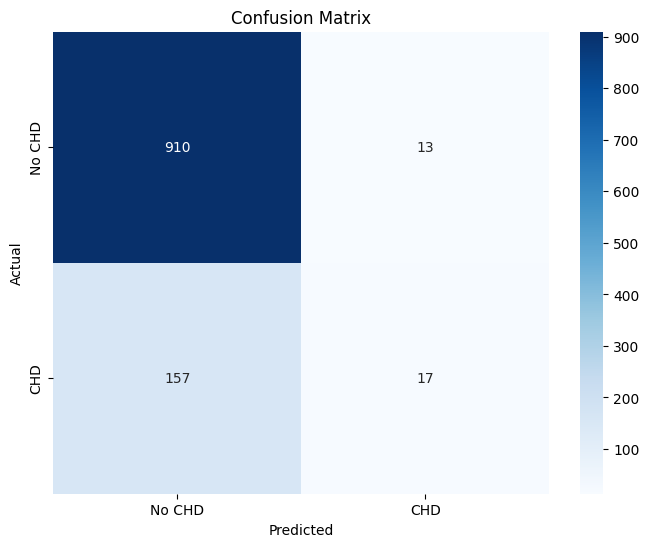

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
